<a href="https://colab.research.google.com/github/istabrak-abbes/spatial-computing/blob/main/OSM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install GDAL and Geopandas
!apt install gdal-bin python-gdal python3-gdal --quiet
!apt install python3-rtree --quiet
!pip install git+git://github.com/geopandas/geopandas.git --quiet
!pip install descartes --quiet
!pip install osmnx
!pip install folium


Reading package lists...
Building dependency tree...
Reading state information...
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
The following additional packages will be installed:
  python3-numpy
Suggested packages:
  python-numpy-doc python3-nose python3-numpy-dbg
The following NEW packages will be installed:
  python3-gdal python3-numpy
0 upgraded, 2 newly installed, 0 to remove and 37 not upgraded.
Need to get 2,288 kB of archives.
After this operation, 13.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-numpy amd64 1:1.13.3-2ubuntu1 [1,943 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python3-gdal amd64 2.2.3+dfsg-2 [346 kB]
Fetched 2,288 kB in 3s (835 kB/s)
Selecting previously unselected package python3-numpy.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack .../python3-numpy_1%3a1.13.3-2ubun

In [1]:
!pip install matplotlib==3.1.3

     |████████████████████████████████| 13.1 MB 3.5 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.5 which is incompatible.
osmnx 1.1.2 requires matplotlib>=3.4, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [2]:
import pandas as pd
import geopandas as gpd
import osmnx as ox
import folium
from pyproj import CRS
import matplotlib.pyplot as plt
import seaborn as sns

## Streets

In [3]:
place = "Tunis, Gouvernorat Tunis, Tunisie"
graph = ox.graph_from_place(place, network_type='drive')

In [4]:
len(graph)

27605

In [5]:
type(graph)

networkx.classes.multidigraph.MultiDiGraph

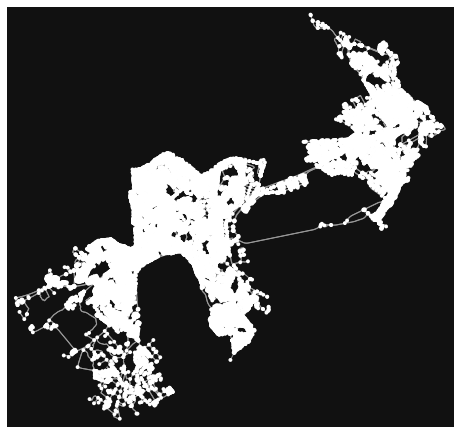

In [6]:
# Plot the streets
fig, ax = ox.plot_graph(graph)

In [7]:
nodes, edges = ox.graph_to_gdfs(graph)

In [8]:
nodes.head()

y          x  street_count highway                   geometry
osmid                                                                          
93850200  36.800008  10.186003             3     NaN  POINT (10.18600 36.80001)
93850204  36.800039  10.186457             3     NaN  POINT (10.18646 36.80004)
93850205  36.800095  10.186511             3     NaN  POINT (10.18651 36.80010)
93850207  36.800455  10.186438             3     NaN  POINT (10.18644 36.80046)
93851643  36.800491  10.189992             3     NaN  POINT (10.18999 36.80049)

In [9]:
edges.head()

osmid lanes      ref  ... access width tunnel
u        v          key                           ...                    
93850200 93850204   0    10641456     3  RN 9 طو  ...    NaN   NaN    NaN
         1089665187 0    11625417   NaN      NaN  ...    NaN   NaN    NaN
93850204 93850205   0    10641456     3  RN 9 طو  ...    NaN   NaN    NaN
93850205 1089665109 0    10641456     3  RN 9 طو  ...    NaN   NaN    NaN
         103795990  0    26280274     3  RN 9 طو  ...    NaN   NaN    NaN

[5 rows x 14 columns]

In [10]:
street_types = pd.DataFrame(edges["highway"].apply(pd.Series)[0].value_counts().reset_index())
street_types.columns = ["type", "count"]

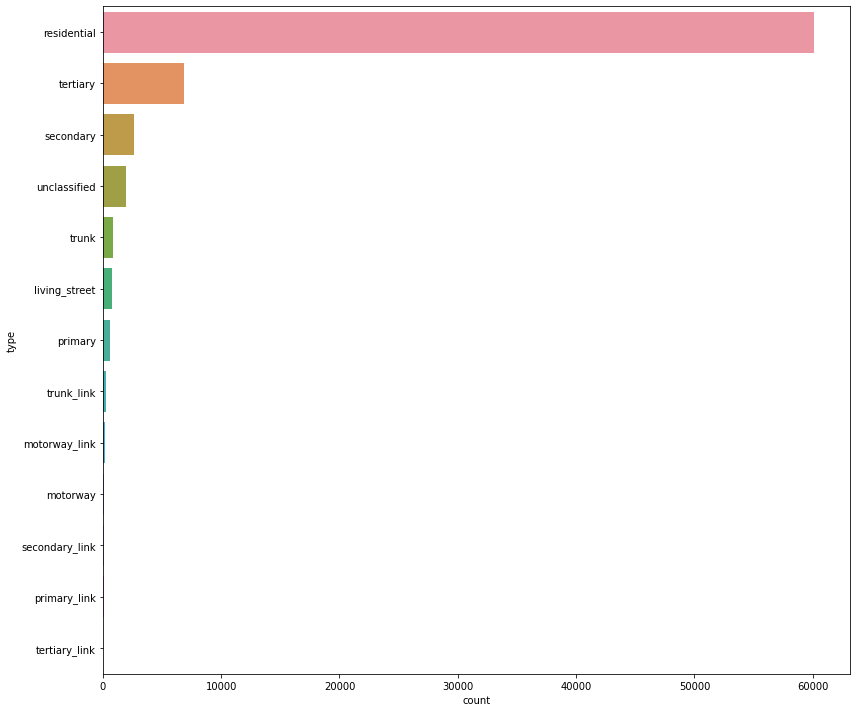

In [11]:
fig, ax = plt.subplots(figsize=(12,10))
sns.barplot(y="type", x="count", data=street_types, ax=ax)
plt.tight_layout()
plt.savefig("barchart.png")

Tekhdem juste il faut la telecharger ! el colab kbira alih

In [12]:
#à ne pas toucher !!!!!!!!!!!!!!!  Tekhdem juste il faut la telecharger ! el colab kbira alih !!!!
style = {'color': '#F7DC6F', 'weight':'1'}
m = folium.Map([36.81698,10.17883],
               zoom_start=15,
               tiles="CartoDb dark_matter")
folium.GeoJson(edges, style_function=lambda x: style).add_to(m)
m.save("streets.html")
m

#Place polygon

In [13]:
# Get place boundary related to the place name as a geodataframe
area = ox.geocode_to_gdf(place)

In [14]:
type(area)

geopandas.geodataframe.GeoDataFrame

In [15]:
area

geometry  ...  importance
0  MULTIPOLYGON (((10.00379 36.78692, 10.00593 36...  ...    0.851228

[1 rows x 14 columns]

<AxesSubplot:>

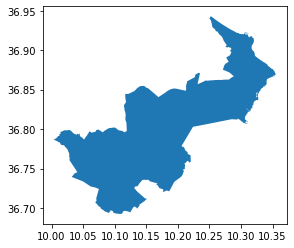

In [16]:
# Plot the area:
area.plot()

## Building footprints

In [17]:
tags = {'building': True}
buildings = ox.geometries_from_place(place,tags)

/usr/local/lib/python3.7/dist-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
/usr/local/lib/python3.7/dist-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):


In [18]:
len(buildings)

14473

In [19]:
buildings.head()

alt_name alt_name:ar  ... short_name:en name:ro
element_type osmid                            ...                      
node         631655301       NaN         NaN  ...           NaN     NaN
             1036984974      NaN         NaN  ...           NaN     NaN
             1037011673      NaN         NaN  ...           NaN     NaN
             1103254611      NaN         NaN  ...           NaN     NaN
             1367084923      NaN         NaN  ...           NaN     NaN

[5 rows x 205 columns]

In [20]:
buildings.shape

(14473, 205)

In [21]:
buildings.columns

Index(['alt_name', 'alt_name:ar', 'amenity', 'brand', 'brand:ar', 'brand:en',
       'brand:wikidata', 'brand:wikipedia', 'brand:wikipedia:ar', 'name',
       ...
       'official_name:en', 'official_name:fr', 'old_name:en', 'name:ko',
       'name:ur', 'name:zh', 'colour', 'name:pt', 'short_name:en', 'name:ro'],
      dtype='object', length=205)

In [22]:
cols = ['amenity','building', 'name', 'tourism']
buildings[cols].head()

amenity building                 name tourism
element_type osmid                                                             
node         631655301                NaN      yes  LG R&D center Tunis     NaN
             1036984974  place_of_worship   mosque          مسجد السلام     NaN
             1037011673               NaN      yes   استريم غلوبل سرفسز     NaN
             1103254611  place_of_worship   mosque                 مسجد     NaN
             1367084923               NaN   public        جمارك الميناء     NaN

In [ ]:
#list(buildings.columns)

In [ ]:
#buildings["amenity"].apply(pd.Series)[0].value_counts()


In [23]:
buildings["amenity"].apply(pd.Series)[0].value_counts()

place_of_worship     75
bank                 43
restaurant           31
cafe                 25
post_office          20
arts_centre          16
hospital             12
police               11
public_building      11
clinic               11
marketplace          10
townhall              9
school                9
parking               9
pharmacy              6
fast_food             5
university            5
veterinary            5
community_centre      3
car_rental            3
car_wash              3
kindergarten          3
courthouse            2
studio                2
prep_school           2
embassy               2
casino                2
library               2
bus_station           2
toilets               2
theatre               2
fuel                  2
music_school          1
dojo                  1
conference_centre     1
social_facility       1
nightclub             1
bar                   1
recycling             1
yes                   1
fire_station          1
college         

In [24]:
style_buildings = {'color':'#6C3483 ', 'fillColor': '#6C3483 ', 'weight':'1', 'fillOpacity' : 1}

m = folium.Map([30.430550, -9.595280],
               zoom_start=15,

               tiles="Stamen Toner")

folium.GeoJson(buildings[:1000], style_function=lambda x: style_buildings).add_to(m)
m.save("buildings.html")
m

## Point of Interest - Restaurant


In [25]:
# List key-value pairs for tags
tags = {'amenity': 'restaurant'}

In [26]:
# Retrieve restaurants
restaurants = ox.geometries_from_place(place, tags)

# How many restaurants do we have?
len(restaurants)

378

In [27]:
restaurants.columns.values

array(['amenity', 'cuisine', 'name', 'geometry', 'name:ar', 'name:fr',
       'addr:city', 'name:en', 'addr:city:ar', 'addr:housenumber',
       'addr:postcode', 'addr:street', 'addr:street:ar', 'fax', 'phone',
       'smoking', 'drink:wine', 'website', 'internet_access', 'barrier',
       'shop', 'delivery', 'opening_hours', 'opening_hours:covid19',
       'contact:phone', 'contact:website', 'email', 'operator', 'tourism',
       'contact:fax', 'addr:country', 'opening_hours:signed',
       'addr:governorate', 'diet:pescetarian', 'is_in:city',
       'is_in:continent', 'is_in:country', 'is_in:governorate',
       'addr:housename', 'drive_in', 'source:amenity', 'capacity',
       'takeaway', 'addr:street:fr', 'outdoor_seating', 'addr:suburb',
       'name_alt', 'addr:neighbourhood', 'addr:district',
       'internet_access:fee', 'is_in:neighbourhood', 'diet:halal',
       'language:ar', 'breakfast', 'drink:coffee', 'note', 'description',
       'contact:tripadvisor', 'brand', 'brand:wi

In [28]:
# Select some useful cols and print
cols = ['name', 'opening_hours', 'addr:city', 'addr:country', 
        'addr:housenumber', 'addr:postcode', 'addr:street']

# Print only selected cols
restaurants[cols].head(10)

name  ...          addr:street
element_type osmid                                                 ...                     
node         330182866                                Le Capitole  ...                  NaN
             393271101                                      أليسا  ...                  NaN
             559413719                            Parad'Ice Plaza  ...                  NaN
             567484227                                     لوكولس  ...  شارع الحبيب بورقيبة
             1037000997                       Restaurant Le Golfe  ...                  NaN
             1037009652                         Venizia Fast-Food  ...                  NaN
             1037019511  Resterant Universitaire Omrane Superieur  ...                  NaN
             1037098515                     دار الجلد Dar El Jeld  ...                  NaN
             1037100788                                 غرين سنتر  ...                  NaN
             1037132044                                      بيوا  ...                  NaN

[10 rows x 7 columns]

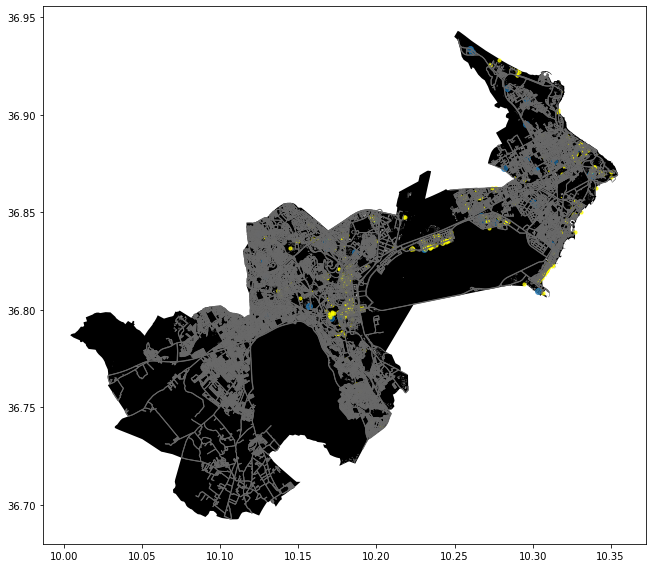

In [29]:
fig, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
area.plot(ax=ax, facecolor='black')

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='dimgray')

# Plot buildings
buildings.plot(ax=ax, facecolor='silver', alpha=0.7)

# Plot restaurants
restaurants.plot(ax=ax, color='yellow', alpha=0.7, markersize=10)
plt.tight_layout()

#Park polygons

In [30]:
tags = {'leisure': 'park', 'landuse': 'grass'}

In [31]:
# Get the data
parks = ox.geometries_from_place(place, tags)

# Check the result
print("Retrieved", len(parks), "objects")

/usr/local/lib/python3.7/dist-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
/usr/local/lib/python3.7/dist-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):


Retrieved 382 objects


In [32]:
parks.head(3)

access barrier  ... ways type
element_type osmid                      ...          
node         1037020738    NaN     NaN  ...  NaN  NaN
             8576482673    NaN     NaN  ...  NaN  NaN
             8578361552    NaN     NaN  ...  NaN  NaN

[3 rows x 38 columns]

In [33]:
parks.columns.values

array(['access', 'barrier', 'geometry', 'leisure', 'name', 'nodes',
       'name:ar', 'name:fr', 'created_by', 'alt_name', 'name:ru',
       'wikidata', 'natural', 'landuse', 'name:en', 'name:ko',
       'wikipedia', 'fee', 'name:de', 'tourism', 'amenity', 'addr:city',
       'addr:city:ar', 'addr:street', 'addr:street:ar', 'addr:street:fr',
       'alt_name:ar', 'addr:country', 'addr:governorate',
       'addr:housename', 'sport', 'short_name', 'short_name:ar',
       'addr:postcode', 'source', 'office', 'ways', 'type'], dtype=object)

<AxesSubplot:>

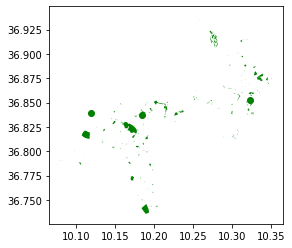

In [34]:
parks.plot(color="green")

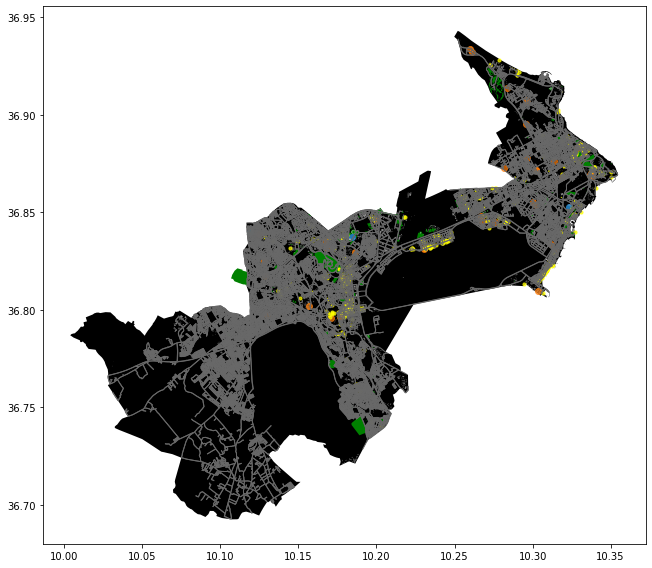

In [35]:
# Create a subplot object for plotting the layers onto a common map
fig, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
area.plot(ax=ax, facecolor='black')

# Plot the parks
parks.plot(ax=ax, facecolor="green")

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='dimgray')

# Plot buildings
buildings.plot(ax=ax, facecolor='silver', alpha=0.7)

# Plot restaurants
restaurants.plot(ax=ax, color='yellow', alpha=0.7, markersize=10)
plt.tight_layout()